<a href="https://colab.research.google.com/github/macotoyusa/README/blob/main/Yusa_Newest_N%3D100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ソーシャルメディアモデル_最新版：Yusa(2023)のオリジナルモデル

In [ ]:
## パラメータの設定
SIZE = 10
TRAITS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
FEATURES = 5
RUNS = 100000
R = 0
PREFERENCE = 0.3

SEED = 1

#Traitsの倉庫(コピペして使ってね！)
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

In [ ]:
## 生成する格子状の社会における関数
# 「位置」を返す関数
def find_location(index, SIZE):
    """
    与えられたインデックスから、サイズが SIZE**2 の正方形のグリッド内でのx座標とy座標を見つけるコード。
    左から右へ、上から下へと行を数えると仮定し、領域は正方形であるとする。
    行と列はPythonのインデックス規則に従って0から始まる。

    e.g.
        0  1  2
    0  [0, 1, 2,
    1   3, 4, 5,
    2   6, 7, 8]

    4 = [1, 1]
    """
    x_pos = index % SIZE
    y_pos = index // SIZE
    return [x_pos, y_pos]

# 「index」を返す関数
def find_index(loc, SIZE):
    """
    位置情報からindexを返す
    """
    index = (loc[1] * SIZE - 1) + (loc[0] + 1)
    return index

# 「Neighborの位置情報」を返す関数
def find_neighbors(loc):
    """
    対象のエージェントの位置情報から、Neighborの位置情報を返す
    """
    N = loc[0], loc[1] - 1
    S = loc[0], loc[1] + 1
    W = loc[0] - 1, loc[1]
    E = loc[0] + 1, loc[1]
    NW = loc[0] - 1, loc[1] - 1
    NE = loc[0] + 1, loc[1] - 1
    SW = loc[0] - 1, loc[1] + 1
    SE = loc[0] + 1, loc[1] + 1
    return [N, S, W, E, NW, NE, SW, SE]

In [ ]:
## モデルとエージェントの定義
# モデルを生成するためのエージェント
class Agent():

    def __init__(self):
        self.culture = [rd.choice(TRAITS) for i in range(FEATURES)]

    # 交流時、エージェントの文化を変容させる関数
    def culture_share(self, target, model, soc):

      #隣人との類似度の算出
      similarity_n = 0
      for i in model.agents[target].culture:
        if i == self.culture[model.agents[target].culture.index(i)]:
          similarity_n += 1
      interaction_probability_n = similarity_n / FEATURES

      #変容の過程
      if rd.uniform(0, 1) < interaction_probability_n:
        while True:
          shared = rd.randint(0, FEATURES - 1)
          if interaction_probability_n == 1.0:
            break
          elif self.culture[shared] != model.agents[target].culture[shared]:
            if model.agents[target].culture == soc.culture[shared]:
              self.culture[shared] = model.agents[target].culture[shared]
              break
            else:
              if rd.uniform(0, 1) < R:
                pass
              else:
                self.culture[shared] = model.agents[target].culture[shared]
                break
          else:
            pass

# モデルの定義
class Axelrod():

    def __init__(self):
        self.agents = [Agent() for i in range(SIZE**2)]

    # Activeと、そのNeighborを交流させる関数 (Activeのindexに応じて、より正確にNeighborを定義した)
    def tick(self, model):
        try:
            active = rd.choice(self.agents)
            active_num = find_index((find_location((model.agents.index(active)), SIZE)), SIZE)

            while True:
              if active_num == 0:
                weight_list = [0,1,0,1,0,0,0,1]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [1, 3, 7]

              elif active_num == 9:
                weight_list = [0,1,1,0,0,0,1,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [1, 2, 6]

              elif active_num == 90:
                weight_list = [1,0,0,1,0,1,0,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [0, 3, 5]

              elif active_num == 99:
                weight_list = [1,0,1,0,1,0,0,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [0, 2, 4]

              elif 1 <= active_num < 9:
                weight_list = [0,1,1,1,0,0,1,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [1, 2, 3, 6, 7]

              elif 91 <= active_num < 99:
                weight_list = [1,0,1,1,1,1,0,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [0, 2, 3, 4, 5]

              elif active_num % 10 == 0:
                weight_list = [1,1,0,1,0,1,0,1]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [0, 1, 3, 5, 7]

              elif (active_num + 1) % 10 == 0:
                weight_list = [1,1,1,0,1,0,1,0]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break
              #in [0, 1, 2, 4, 6]

              else:
                weight_list = [1,1,1,1,1,1,1,1]
                passive = find_index(rd.choices(find_neighbors(find_location(model.agents.index(active), SIZE)), weights=weight_list)[0], SIZE)
                break

            soc = SocMedia(model, active)
            active.culture_share(passive, self, soc)
        except IndexError:
            self.tick(model)

    # モデルの文化を、リストのような形で返す関数
    def show_state(self):
        for n in range(0, SIZE):
            row = [self.agents[i].culture for i in range(n * SIZE, n * (SIZE) + SIZE)]
            for agent in row:
                print("[", end="")
                print(*agent, sep=",", end="")
                print("]", end="")
            print()
            print("-" * (SIZE*FEATURES*2+SIZE))

    # 一定回数シミュレーションを繰り返す関数
    def run_sim(self):
        print("Initial state of the model:")
        print()
        self.show_state()
        print()
        print("Running simulation...")
        for r in range(1,RUNS):
          self.tick(model)
        print("Final state of the model:")
        self.show_state()

###ソーシャルメディアの生成
class SocMedia():

    def __init__(self, model, active):
        self.culture = []
        self.choosing = self.choosing(model, active)

    def choosing(self, model, active):
        #似たエージェントのリスト
        lis_sim_agents  = []  #似たエージェントのリスト
        for i in range(0, len(model.agents)):
          a = 0
          for j in range(0, FEATURES):
            if active.culture[j] == model.agents[i].culture[j]:
              a += 1
          if a/FEATURES >= PREFERENCE:
            lis_sim_agents.append(model.agents[i].culture)
        self.culture = rd.choice(lis_sim_agents)

          #activeのFEATURESとその他のエージェントのFEATURESを比較
          #もし、その類似度が、PREFERENCE以上ならリストに入れる
          #そのリストの中から、ランダム(もし可能なら類似性の高さに応じて)にエージェントを抽出し、それをSocMediaのTraitsとする

In [ ]:
##全ケースの初期状態
# シード値の設定
rd.seed(SEED)

model = Axelrod()
model.show_state()

[2,9,1,4,1][7,7,7,6,3][1,7,0,6,6][9,0,7,4,3][9,1,5,0,0][0,8,0,6,3][6,0,8,3,7][7,8,3,5,3][3,7,4,0,6][8,1,2,4,1]
--------------------------------------------------------------------------------------------------------------
[5,8,6,8,3][4,4,9,7,8][6,9,0,7,3][6,6,2,5,8][5,1,7,8,1][2,8,6,5,7][0,7,0,4,9][9,9,6,2,2][8,3,0,3,8][8,3,6,8,5]
--------------------------------------------------------------------------------------------------------------
[9,5,7,4,8][9,0,6,8,2][8,8,3,6,0][7,5,9,8,3][8,6,7,5,6][5,0,8,8,9][9,5,7,9,0][3,2,8,9,2][1,8,4,0,1][1,0,7,0,4]
--------------------------------------------------------------------------------------------------------------
[3,4,1,9,2][5,4,1,2,2][4,8,2,4,4][7,5,7,7,1][0,4,6,5,6][3,4,1,4,8][3,9,6,0,3][0,6,2,0,2][7,8,6,8,3][8,7,3,8,0]
--------------------------------------------------------------------------------------------------------------
[6,9,5,6,0][4,2,3,0,4][1,1,4,4,2][6,9,4,2,0][8,0,9,3,9][7,2,9,8,0][6,3,5,1,3][9,6,9,3,7][1,6,4,8,7][0,5,9,6,4]
-

In [ ]:
##類似度の計算
"ランダムで隣人を選択し、その類似度を測っている。それでいいのか？"
lis_int_prob = []

for i in range(0, len(model.agents)):
  active = model.agents[i]

  #隣人の生成
  neighbours = find_neighbors(find_location(model.agents.index(active), SIZE))
  i_nei = []
  for j in neighbours:
    i_nei.append(find_index(j, SIZE))
  i_nei

  #activeの場所に応じて、とれる隣人が変わる
  if i == 0:
    k = random.choice([1, 3, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 3, 7]


  elif i == 9:
    k = random.choice([1, 2, 6])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 2, 6]


  elif i == 90:
    k = random.choice([0, 3, 5])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 3, 5]


  elif i == 99:
    k = random.choice([0, 2, 4])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 2, 4]


  elif 1 <= i < 9:
    k = random.choice([1, 2, 3, 6, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 2, 3, 6, 7]


  elif 91 <= i < 99:
    k = random.choice([0, 2, 3, 4, 5])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 2, 3, 4, 5]


  elif i % 10 == 0:
    k = random.choice([0, 1, 3, 5, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 1, 3, 5, 7]


  elif (i + 1) % 10 == 0:
    k = random.choice([0, 1, 2, 4, 6])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 1, 2, 4, 6]

  else:
    k = random.choice([0, 1, 2, 3, 4, 5, 6, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

In [ ]:
## 類似度のリストをマトリックスとして表示
list_int_prob = np.array(lis_int_prob)
list_int_prob = list_int_prob.reshape(10, 10)

In [ ]:
## listを正しい順番に並べ替える
l_i_t = np.array([list_int_prob[9]])

for i in [8, 7, 6, 5, 4, 3, 2, 1, 0]:
  l_i_t = np.insert(l_i_t,l_i_t.shape[0], np.array([list_int_prob[i]]), axis=0)

print(l_i_t)

[[0.2 0.  0.  0.2 0.  0.  0.  0.2 0.4 0.2]
 [0.  0.  0.  0.  0.2 0.  0.  0.  0.2 0. ]
 [0.  0.  0.2 0.4 0.2 0.  0.  0.2 0.  0. ]
 [0.  0.4 0.  0.  0.  0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.2 0.  0.  0.2 0.  0.  0. ]
 [0.  0.2 0.4 0.2 0.  0.2 0.  0.2 0.  0. ]
 [0.  0.2 0.2 0.  0.  0.  0.  0.2 0.4 0. ]
 [0.  0.  0.2 0.  0.2 0.  0.4 0.  0.  0. ]
 [0.  0.2 0.4 0.2 0.  0.4 0.  0.  0.  0.2]]


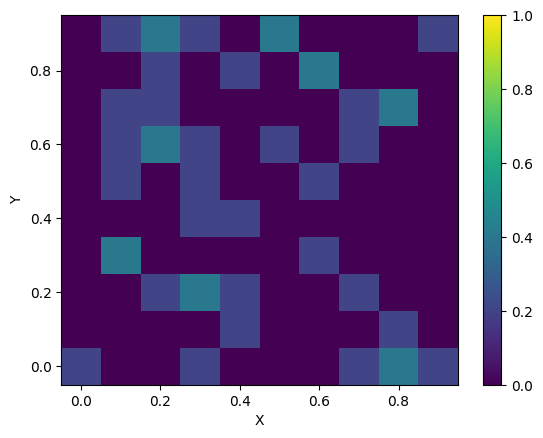

In [ ]:
## 類似度の図示
x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)
X,Y = np.meshgrid(x,y)
Z = l_i_t


aa = plt.pcolormesh(X,Y,Z,vmin=0,vmax=1)
plt.colorbar(aa)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
model.show_state()

[2,9,1,4,1][7,7,7,6,3][1,7,0,6,6][9,0,7,4,3][9,1,5,0,0][0,8,0,6,3][6,0,8,3,7][7,8,3,5,3][3,7,4,0,6][8,1,2,4,1]
--------------------------------------------------------------------------------------------------------------
[5,8,6,8,3][4,4,9,7,8][6,9,0,7,3][6,6,2,5,8][5,1,7,8,1][2,8,6,5,7][0,7,0,4,9][9,9,6,2,2][8,3,0,3,8][8,3,6,8,5]
--------------------------------------------------------------------------------------------------------------
[9,5,7,4,8][9,0,6,8,2][8,8,3,6,0][7,5,9,8,3][8,6,7,5,6][5,0,8,8,9][9,5,7,9,0][3,2,8,9,2][1,8,4,0,1][1,0,7,0,4]
--------------------------------------------------------------------------------------------------------------
[3,4,1,9,2][5,4,1,2,2][4,8,2,4,4][7,5,7,7,1][0,4,6,5,6][3,4,1,4,8][3,9,6,0,3][0,6,2,0,2][7,8,6,8,3][8,7,3,8,0]
--------------------------------------------------------------------------------------------------------------
[6,9,5,6,0][4,2,3,0,4][1,1,4,4,2][6,9,4,2,0][8,0,9,3,9][7,2,9,8,0][6,3,5,1,3][9,6,9,3,7][1,6,4,8,7][0,5,9,6,4]
-

In [ ]:
##シミュレーションの実施
model.run_sim()

Initial state of the model:

[2,9,1,4,1][7,7,7,6,3][1,7,0,6,6][9,0,7,4,3][9,1,5,0,0][0,8,0,6,3][6,0,8,3,7][7,8,3,5,3][3,7,4,0,6][8,1,2,4,1]
--------------------------------------------------------------------------------------------------------------
[5,8,6,8,3][4,4,9,7,8][6,9,0,7,3][6,6,2,5,8][5,1,7,8,1][2,8,6,5,7][0,7,0,4,9][9,9,6,2,2][8,3,0,3,8][8,3,6,8,5]
--------------------------------------------------------------------------------------------------------------
[9,5,7,4,8][9,0,6,8,2][8,8,3,6,0][7,5,9,8,3][8,6,7,5,6][5,0,8,8,9][9,5,7,9,0][3,2,8,9,2][1,8,4,0,1][1,0,7,0,4]
--------------------------------------------------------------------------------------------------------------
[3,4,1,9,2][5,4,1,2,2][4,8,2,4,4][7,5,7,7,1][0,4,6,5,6][3,4,1,4,8][3,9,6,0,3][0,6,2,0,2][7,8,6,8,3][8,7,3,8,0]
--------------------------------------------------------------------------------------------------------------
[6,9,5,6,0][4,2,3,0,4][1,1,4,4,2][6,9,4,2,0][8,0,9,3,9][7,2,9,8,0][6,3,5,1,3][9,6,9

In [ ]:
## 類似度の計算
lis_int_prob = []

for i in range(0, len(model.agents)):
  active = model.agents[i]

#隣人の生成
  neighbours = find_neighbors(find_location(model.agents.index(active), SIZE))
  i_nei = []
  for j in neighbours:
    i_nei.append(find_index(j, SIZE))
  i_nei

#activeの場所に応じて、とれる隣人が変わる
  if i == 0:
    k = random.choice([1, 3, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 3, 7]


  elif i == 9:
    k = random.choice([1, 2, 6])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 2, 6]


  elif i == 90:
    k = random.choice([0, 3, 5])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 3, 5]


  elif i == 99:
    k = random.choice([0, 2, 4])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 2, 4]


  elif 1 <= i < 9:
    k = random.choice([1, 2, 3, 6, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [1, 2, 3, 6, 7]


  elif 91 <= i < 99:
    k = random.choice([0, 2, 3, 4, 5])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 2, 3, 4, 5]


  elif i % 10 == 0:
    k = random.choice([0, 1, 3, 5, 7])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 1, 3, 5, 7]


  elif (i + 1) % 10 == 0:
    k = random.choice([0, 1, 2, 4, 6])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

  #in [0, 1, 2, 4, 6]

  else:
    k = random.choice([0, 3, 5])
    similarity = 0
    for l in range(0, FEATURES):
      if active.culture[l] == model.agents[i_nei[k]].culture[l]:
        similarity += 1
    lis_int_prob.append(similarity / FEATURES)

In [ ]:
## 類似度のリストをマトリックスとして表示
list_int_prob = np.array(lis_int_prob)
list_int_prob = list_int_prob.reshape(10, 10)
print(list_int_prob)

[[0.  0.  0.  0.  1.  1.  1.  1.  0.  0. ]
 [0.  0.  1.  0.  1.  1.  1.  0.  0.  0. ]
 [1.  0.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  0.  1.  0.  0.  1.  1.  1.  1.  1. ]
 [0.  0.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  0.  1.  1.  0.  1.  1.  1.  1.  1. ]
 [0.  1.  1.  1.  0.  1.  1.  1.  1.  0. ]
 [0.2 0.2 0.  1.  1.  0.  0.  0.  0.  0. ]]


In [ ]:
## listを正しい順番に並べ替える
l_i_t = np.array([list_int_prob[9]])

for i in [8, 7, 6, 5, 4, 3, 2, 1, 0]:
  l_i_t = np.insert(l_i_t,l_i_t.shape[0], np.array([list_int_prob[i]]), axis=0)

print(l_i_t)

[[0.2 0.2 0.  1.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  1.  1.  0.  1.  1.  1.  1.  0. ]
 [1.  0.  1.  1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [0.  0.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [1.  0.  1.  0.  0.  1.  1.  1.  1.  1. ]
 [1.  0.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [0.  0.  1.  0.  1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  1.  1.  1.  0.  0. ]]


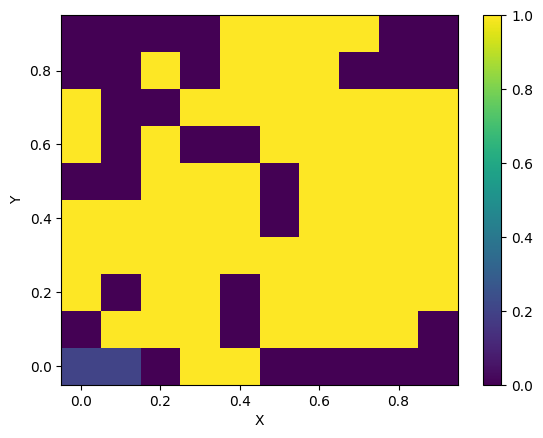

In [ ]:
## 類似度の図示
x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)
X,Y = np.meshgrid(x,y)
Z = l_i_t


aa = plt.pcolormesh(X,Y,Z,vmin=0,vmax=1)
plt.colorbar(aa)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()